# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?"

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos.

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          |
|------------------------|:-------------------|
|Administrative          | Quantidade de acessos em páginas administrativas|
|Administrative_Duration | Tempo de acesso em páginas administrativas |
|Informational           | Quantidade de acessos em páginas informativas  |
|Informational_Duration  | Tempo de acesso em páginas informativas  |
|ProductRelated          | Quantidade de acessos em páginas de produtos |
|ProductRelated_Duration | Tempo de acesso em páginas de produtos |
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  |
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações |
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico |
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) |
|Month                   | Mês  |
|OperatingSystems        | Sistema operacional do visitante |
|Browser                 | Browser do visitante |
|Region                  | Região |
|TrafficType             | Tipo de tráfego                  |
|VisitorType             | Tipo de visitante: novo ou recorrente |
|Weekend                 | Indica final de semana |
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [52]:
# Importando as bibliotecas que serão utilizadas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_score
from tqdm.notebook import tqdm

In [56]:
# Carregando a base de dados

df = pd.read_csv('online_shoppers_intention.csv')

In [57]:
# Visualização inicial da base de dados

df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [58]:
# Não existem dados faltantes na base de dados

df.count()

Administrative             12330
Administrative_Duration    12330
Informational              12330
Informational_Duration     12330
ProductRelated             12330
ProductRelated_Duration    12330
BounceRates                12330
ExitRates                  12330
PageValues                 12330
SpecialDay                 12330
Month                      12330
OperatingSystems           12330
Browser                    12330
Region                     12330
TrafficType                12330
VisitorType                12330
Weekend                    12330
Revenue                    12330
dtype: int64

In [59]:
# Contagem da variável resposta

df.Revenue.value_counts(dropna=False)

Revenue
False    10422
True      1908
Name: count, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [60]:
# Cria uma cópia do dataframe original

df_1 = df.copy()

In [61]:
# Pegando as 6 primeiras colunas da base de dados que serão utilizadas na análise.

df_variaveis = df.iloc[:,0:6]

df_variaveis['Revenue'] = df['Revenue']

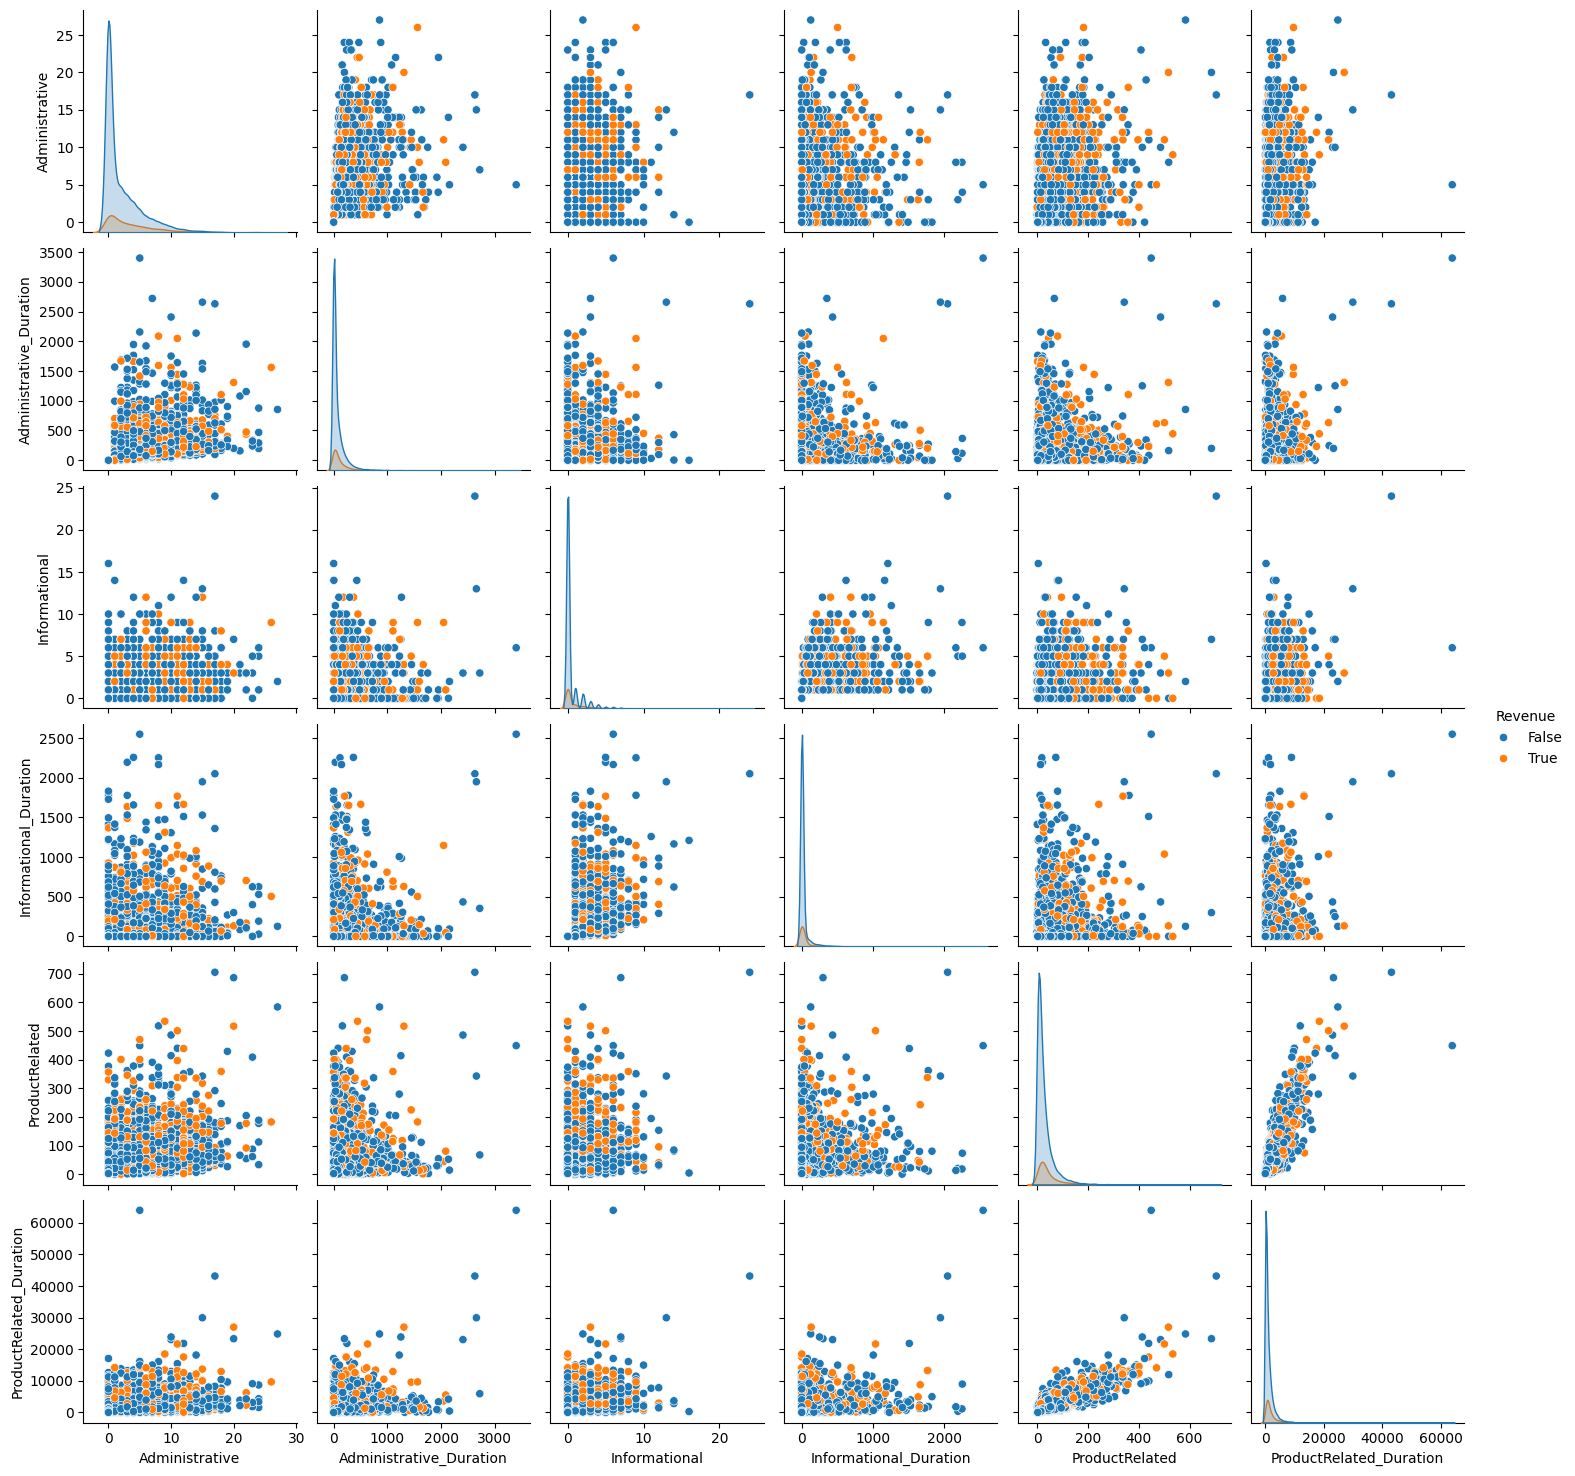

In [62]:
# Analisando a distribuição das variáveis não é possível visualizar uma boa separação das variáveis.
# Isso pode estar relacionado com a escala de cada uma das variáveis.

sns.pairplot(df_variaveis, hue='Revenue')

In [63]:
# Pegando as 6 primeiras colunas da base de dados que serão utilizadas na análise.

df_variaveis = df.iloc[:,0:6]

In [64]:
# Para minimizar o efeito dos valores das variáveis será utilizado a normalização das variáveis.

X_pad = pd.DataFrame(StandardScaler().fit_transform(df_variaveis), columns = df_variaveis.columns)

## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

In [65]:
variaveis = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration']

In [66]:
# Para determinar a quantidade de grupos será utilizado o método do cotovelo e da silueta

# Cotovelo

SQD = []
K = range(1,15)
for k in tqdm(K):
    km = KMeans(n_clusters=k, n_init=8)
    km = km.fit(X_pad[variaveis])
    SQD.append(km.inertia_)

  0%|          | 0/14 [00:00<?, ?it/s]

<Axes: xlabel='num_clusters'>

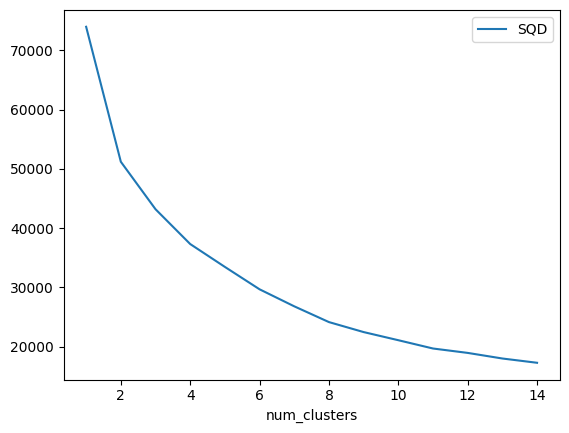

In [67]:
# Aparentemente as maiores quebras estão no n = 2 a 4

df_2 = pd.DataFrame({'num_clusters': list(range(1, len(SQD)+1)), 'SQD': SQD})
df_2.plot(x = 'num_clusters', y = 'SQD')

In [68]:
# Método da Silueta

# Inicializar uma lista vazia que vai conter os valores da silueta média
siluetas = []

# Este é o número máximo de grupos que vamos testar
max_clusters = 10

# O loop percorre de 2 até o máximo de clusters
for n_clusters in tqdm(range(2, max_clusters+1)):
    # Aqui rodamos o k-means
    km = KMeans(n_clusters=n_clusters, n_init=8).fit(X_pad[variaveis])
    # Aqui calculamos a silueta e guardamos o resultado na lista 'siluetas'
    siluetas.append(silhouette_score(X_pad[variaveis], km.labels_))
    # Essa list comprehendion define o nome dos grupos
    nomes_grupos = ['grupo_' + str(g) for g in range(n_clusters)]
    # Agora vamos adicionar uma coluna no dataframe X_pad com o agrupamento construido
    X_pad['grupos_'+str(n_clusters)] = pd.Categorical.from_codes(km.labels_, categories = nomes_grupos)

  0%|          | 0/9 [00:00<?, ?it/s]

<Axes: xlabel='n_clusters'>

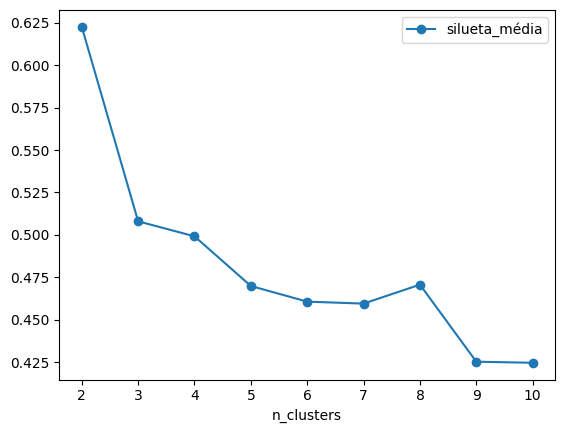

In [69]:
# Segundo o método, o melhor número de clusters é 2

df_silueta = pd.DataFrame({'n_clusters': list(range(2, max_clusters+1)), 'silueta_média': siluetas})

df_silueta.plot.line(x = 'n_clusters', y = 'silueta_média', marker='o')

## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final.
- Se puder, sugira nomes para os grupos.

In [73]:
X_pad.head()

Administrative  Administrative_Duration  Informational  \
0       -0.696993                -0.457191      -0.396478   
1       -0.696993                -0.457191      -0.396478   
2       -0.696993                -0.457191      -0.396478   
3       -0.696993                -0.457191      -0.396478   
4       -0.696993                -0.457191      -0.396478   

   Informational_Duration  ProductRelated  ProductRelated_Duration grupos_2  \
0               -0.244931       -0.691003                -0.624348  grupo_0   
1               -0.244931       -0.668518                -0.590903  grupo_0   
2               -0.244931       -0.691003                -0.624348  grupo_0   
3               -0.244931       -0.668518                -0.622954  grupo_0   
4               -0.244931       -0.488636                -0.296430  grupo_0   

  grupos_3 grupos_4 grupos_5 grupos_6 grupos_7 grupos_8 grupos_9 grupos_10  
0  grupo_0  grupo_0  grupo_1  grupo_0  grupo_1  grupo_2  grupo_2   grupo_1  
1  grupo_0  grupo_0  grupo_1  grupo_0  grupo_1  grupo_2  grupo_2   grupo_1  
2  grupo_0  grupo_0  grupo_1  grupo_0  grupo_1  grupo_2  grupo_2   grupo_1  
3  grupo_0  grupo_0  grupo_1  grupo_0  grupo_1  grupo_2  grupo_2   grupo_1  
4  grupo_0  grupo_0  grupo_1  grupo_0  grupo_1  grupo_2  grupo_2   grupo_1

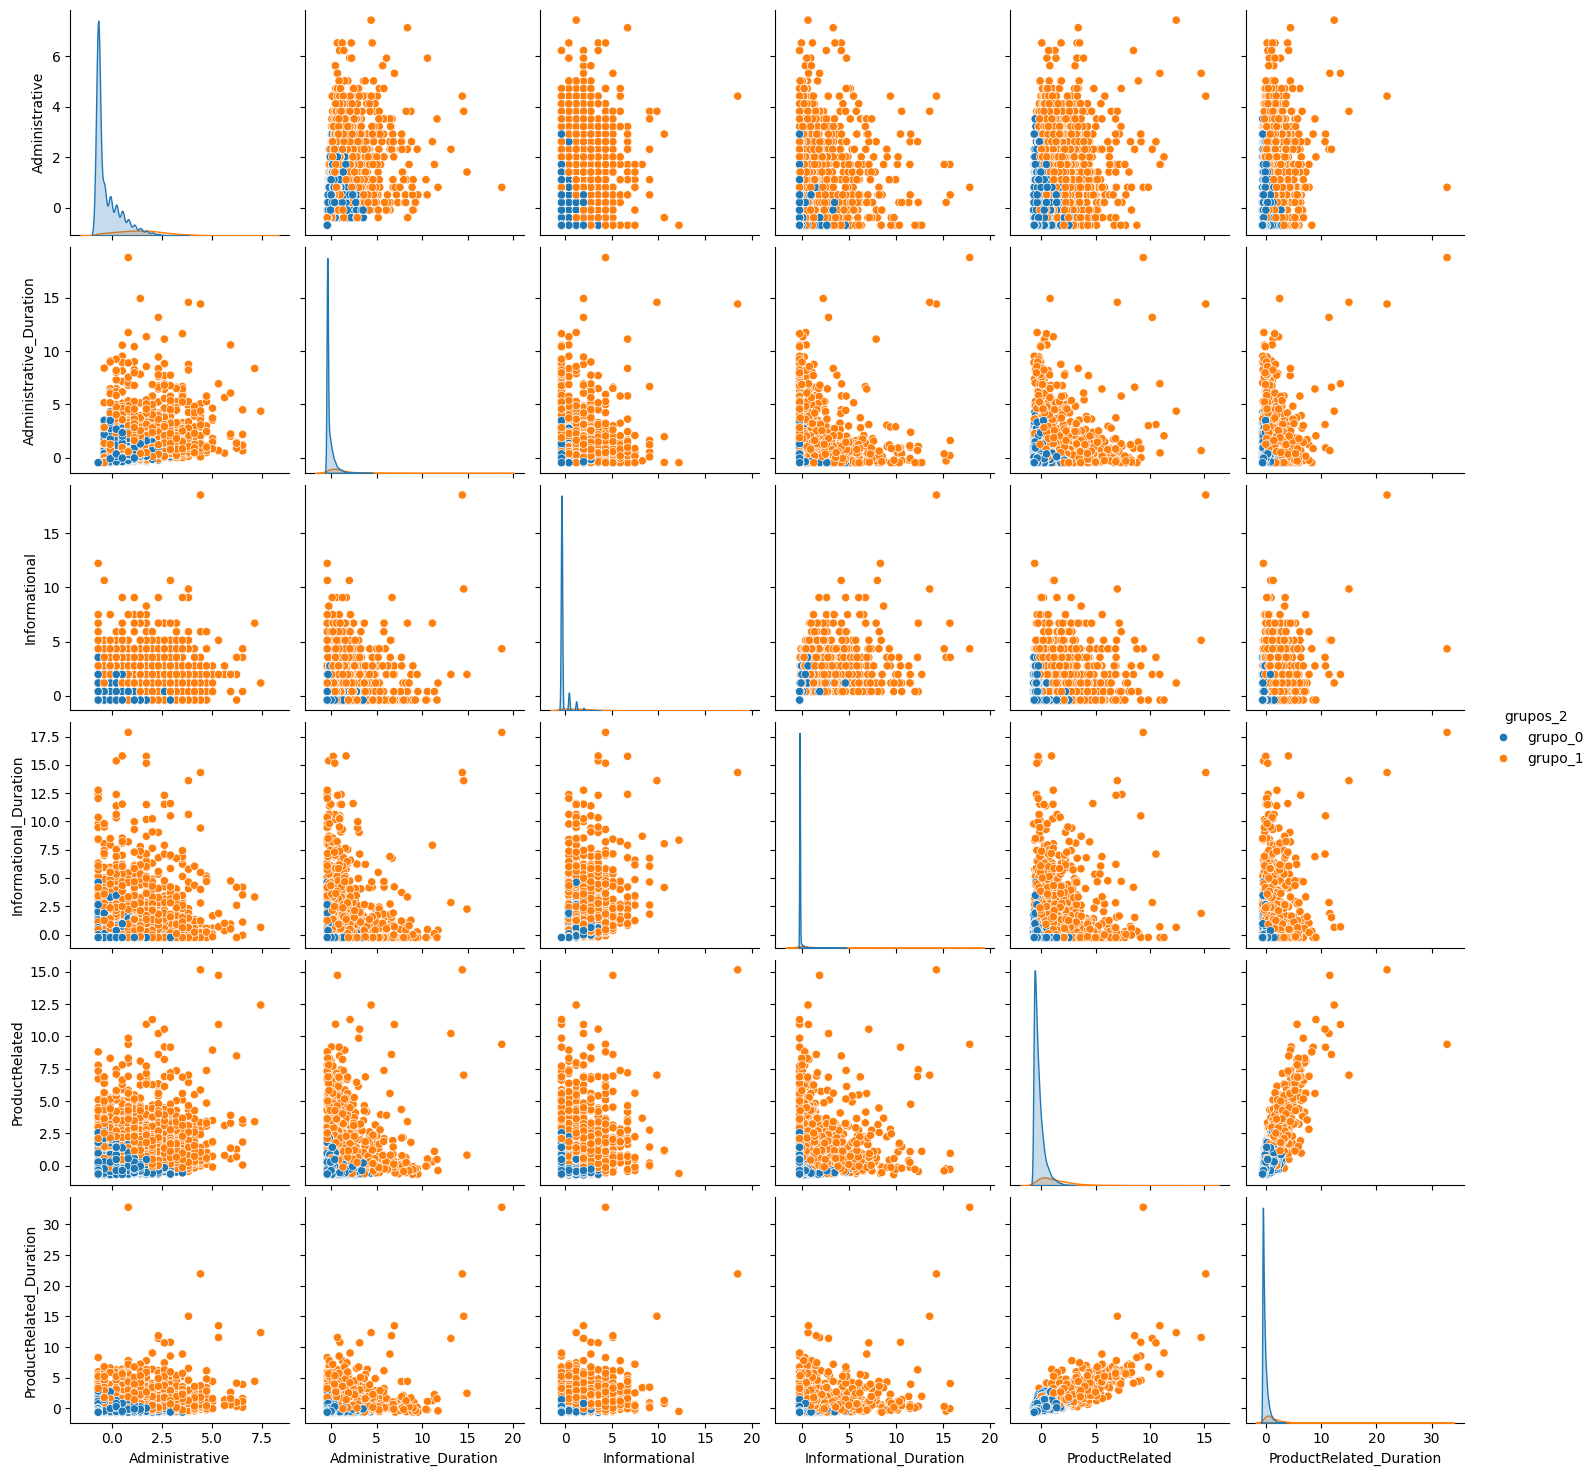

In [74]:
n_clusters = 2
var_grupo = 'grupos_' + str(n_clusters)
sns.pairplot(X_pad[variaveis + [var_grupo]], hue=var_grupo)

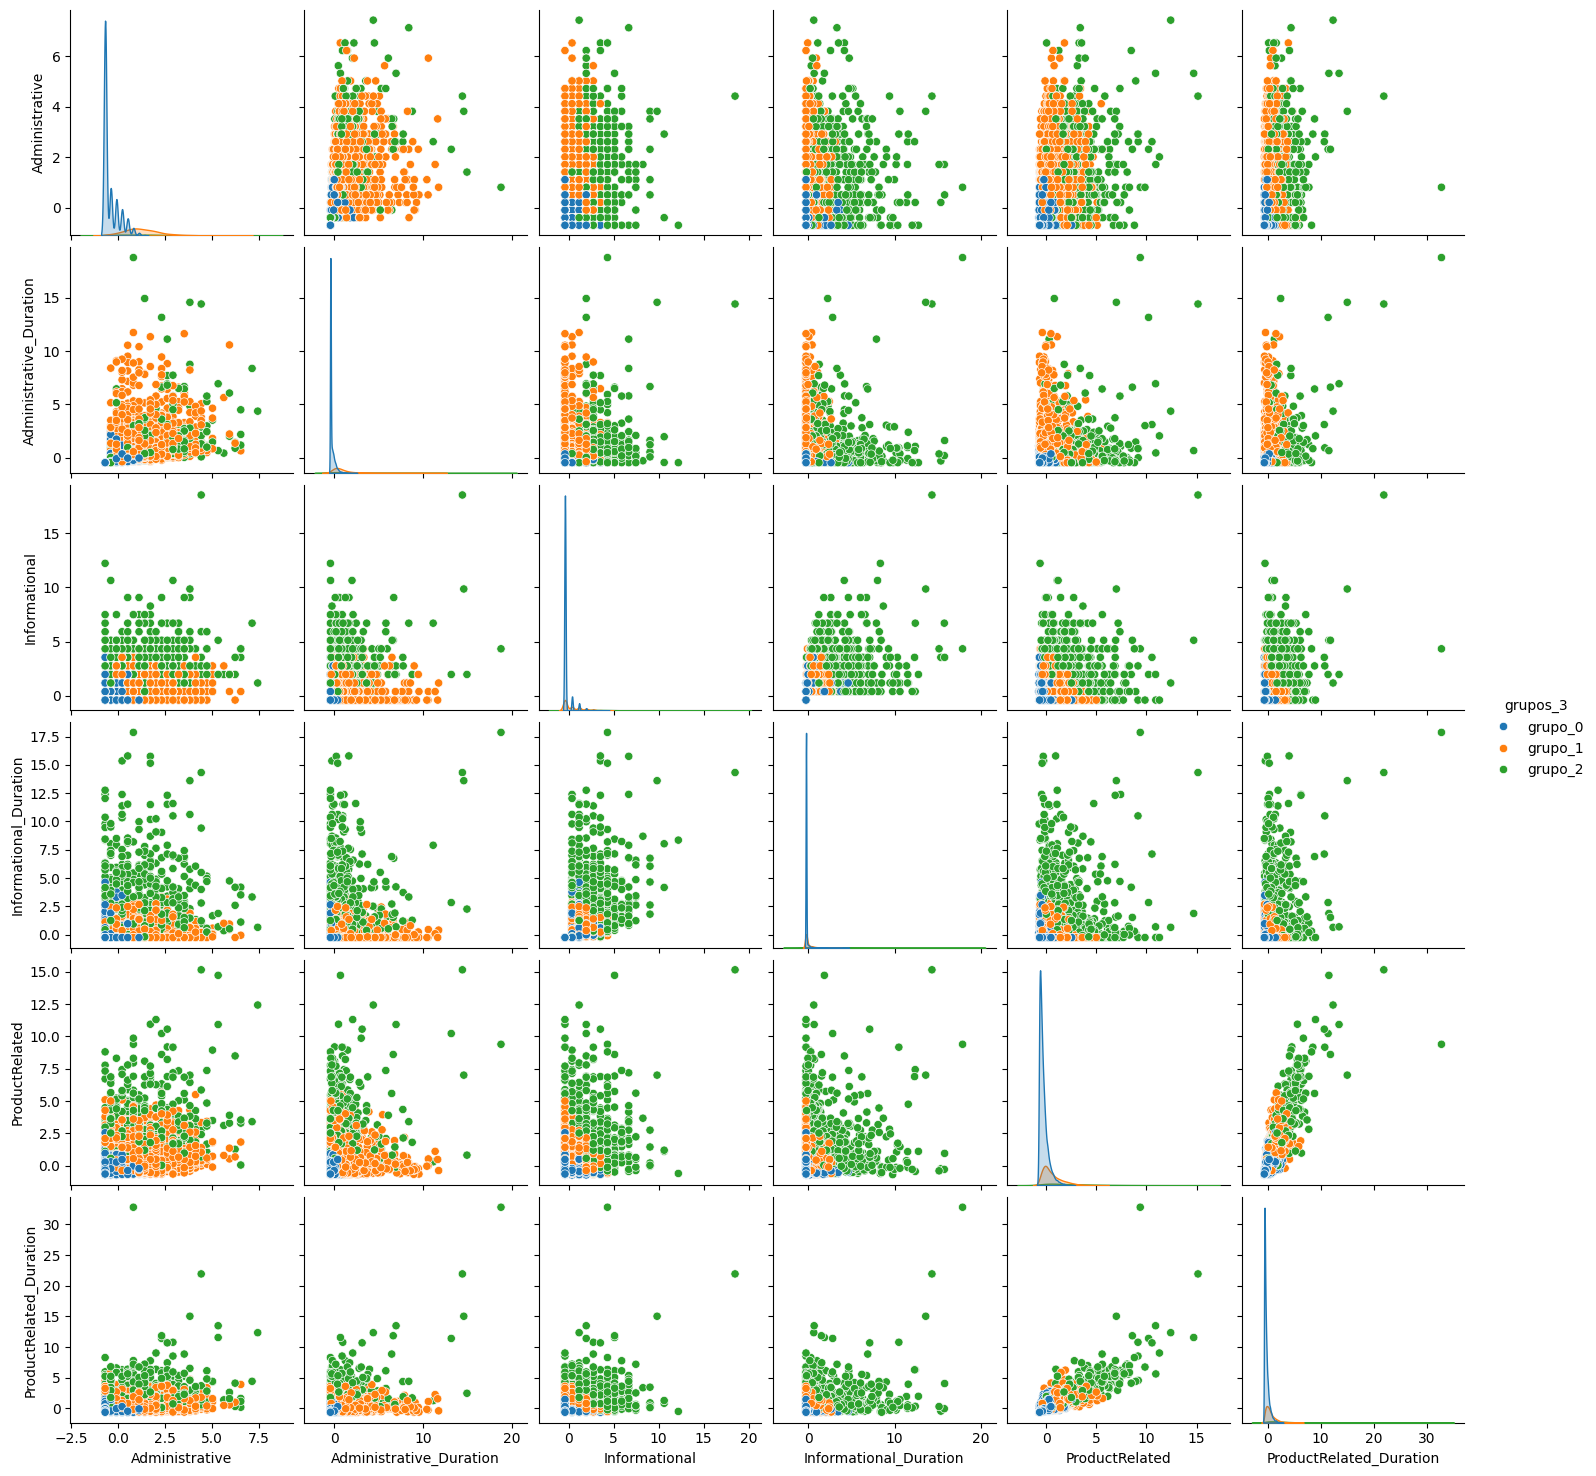

In [75]:
n_clusters = 3
var_grupo = 'grupos_' + str(n_clusters)
sns.pairplot(X_pad[variaveis + [var_grupo]], hue=var_grupo)

## Insights

### Dois Grupos

- Com dois grupos podemos observar dois grupos distintos, o grupo_0 está mais concentrado com pessoas que gastam pouco tempo dentro das páginas, além disso é um grupo bem menor do que o grupo_1.
- Já o grupo_1 apresenta uma quantidade maior de pessoas e de tempo gasto dentro das páginas.
- Essas características podem ser observadas em todas as variáveis.

Um nome adequado para cada grupo talvez fosse:
- grupo_0: Pouco tempo e poucos acessos;
- grupo_1: Mais tempo e mais acessos.


### Três Grupos

- Com três grupos observa-se que o grupo_0 mantêm as mesmas caracterísitcas vistas no grupo_0, anterior.
- Já o grupo_1 se dividiu, mantendo parte como grupo_1 e formando também o grupo_2.
- Observa-se que tanto o grupo_1, quanto o grupo_2 para sites informativos e de produtos seguem o mesmo padrão. O grupo_1 com um pouco mais de acessos e tempo gasto em comparação com o grupo_0, enquanto o grupo_2 com muito mais acessos e tempo gasto, em relação aos demais.
- Contudo essa tendencia não é verificada para os sites administrativos, em que se observa maior quantidade de pessoas no grupo_1 com mais acessos e tempo gasto, em comparação com os demais grupos.

Um nome adequado para cada grupo talvez fosse:
- grupo_0: Pouco tempo e poucos acessos;
- grupo_1: Mais tempo e mais acessos em sites administrativos.
- grupo_2: Mais tempo e mais acessos em sites informativos e produtos.


## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*).
- Qual grupo possui clientes mais propensos à compra?

In [81]:
X_pad

Administrative  Administrative_Duration  Informational  \
0           -0.696993                -0.457191      -0.396478   
1           -0.696993                -0.457191      -0.396478   
2           -0.696993                -0.457191      -0.396478   
3           -0.696993                -0.457191      -0.396478   
4           -0.696993                -0.457191      -0.396478   
...               ...                      ...            ...   
12325        0.206173                 0.363075      -0.396478   
12326       -0.696993                -0.457191      -0.396478   
12327       -0.696993                -0.457191      -0.396478   
12328        0.507228                -0.032916      -0.396478   
12329       -0.696993                -0.457191      -0.396478   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                   -0.244931       -0.691003                -0.624348   
1                   -0.244931       -0.668518                -0.590903   
2                   -0.244931       -0.691003                -0.624348   
3                   -0.244931       -0.668518                -0.622954   
4                   -0.244931       -0.488636                -0.296430   
...                       ...             ...                      ...   
12325               -0.244931        0.478227                 0.307822   
12326               -0.244931       -0.601062                -0.380957   
12327               -0.244931       -0.578577                -0.528063   
12328               -0.244931       -0.376210                -0.443536   
12329               -0.244931       -0.646033                -0.613243   

      grupos_2 grupos_3 grupos_4 grupos_5 grupos_6 grupos_7 grupos_8 grupos_9  \
0      grupo_0  grupo_0  grupo_0  grupo_1  grupo_0  grupo_1  grupo_2  grupo_2   
1      grupo_0  grupo_0  grupo_0  grupo_1  grupo_0  grupo_1  grupo_2  grupo_2   
2      grupo_0  grupo_0  grupo_0  grupo_1  grupo_0  grupo_1  grupo_2  grupo_2   
3      grupo_0  grupo_0  grupo_0  grupo_1  grupo_0  grupo_1  grupo_2  grupo_2   
4      grupo_0  grupo_0  grupo_0  grupo_1  grupo_0  grupo_1  grupo_2  grupo_2   
...        ...      ...      ...      ...      ...      ...      ...      ...   
12325  grupo_0  grupo_0  grupo_0  grupo_2  grupo_4  grupo_6  grupo_0  grupo_0   
12326  grupo_0  grupo_0  grupo_0  grupo_1  grupo_0  grupo_1  grupo_2  grupo_2   
12327  grupo_0  grupo_0  grupo_0  grupo_1  grupo_0  grupo_1  grupo_2  grupo_2   
12328  grupo_0  grupo_0  grupo_0  grupo_1  grupo_0  grupo_6  grupo_2  grupo_0   
12329  grupo_0  grupo_0  grupo_0  grupo_1  grupo_0  grupo_1  grupo_2  grupo_2   

      grupos_10  Revenue  BounceRates  
0       grupo_1    False     0.200000  
1       grupo_1    False     0.000000  
2       grupo_1    False     0.200000  
3       grupo_1    False     0.050000  
4       grupo_1    False     0.020000  
...         ...      ...          ...  
12325   grupo_7    False     0.007143  
12326   grupo_1    False     0.000000  
12327   grupo_1    False     0.083333  
12328   grupo_1    False     0.000000  
12329   grupo_1    False     0.000000  

[12330 rows x 17 columns]

In [76]:
X_pad['Revenue'] = df['Revenue']

<ipython-input-85-5dd71e2b04c0>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax = X_pad.groupby(['grupos_2', 'Revenue'])['Revenue'].count().unstack().plot.bar();


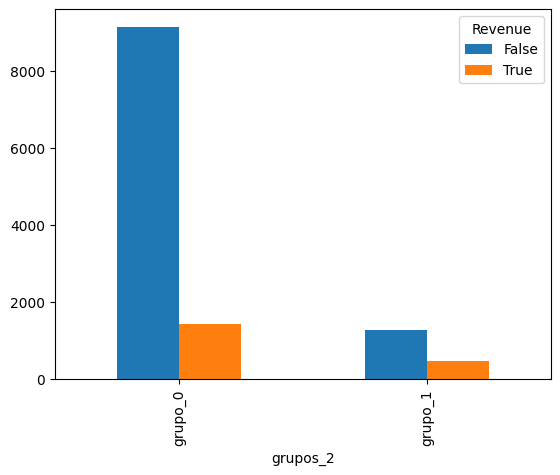

In [85]:
ax = X_pad.groupby(['grupos_2', 'Revenue'])['Revenue'].count().unstack().plot.bar();

In [105]:
X_pad['BounceRates'] = df['BounceRates']

<ipython-input-104-a6cc55a82309>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax = X_pad.groupby(['grupos_2', 'BounceRates'])['BounceRates'].count().unstack().plot.bar(stacked=True);


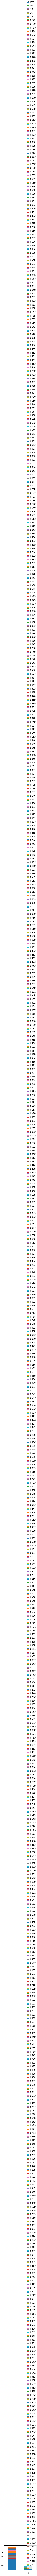

In [104]:
ax = X_pad.groupby(['grupos_2', 'BounceRates'])['BounceRates'].count().unstack().plot.bar(stacked=True);

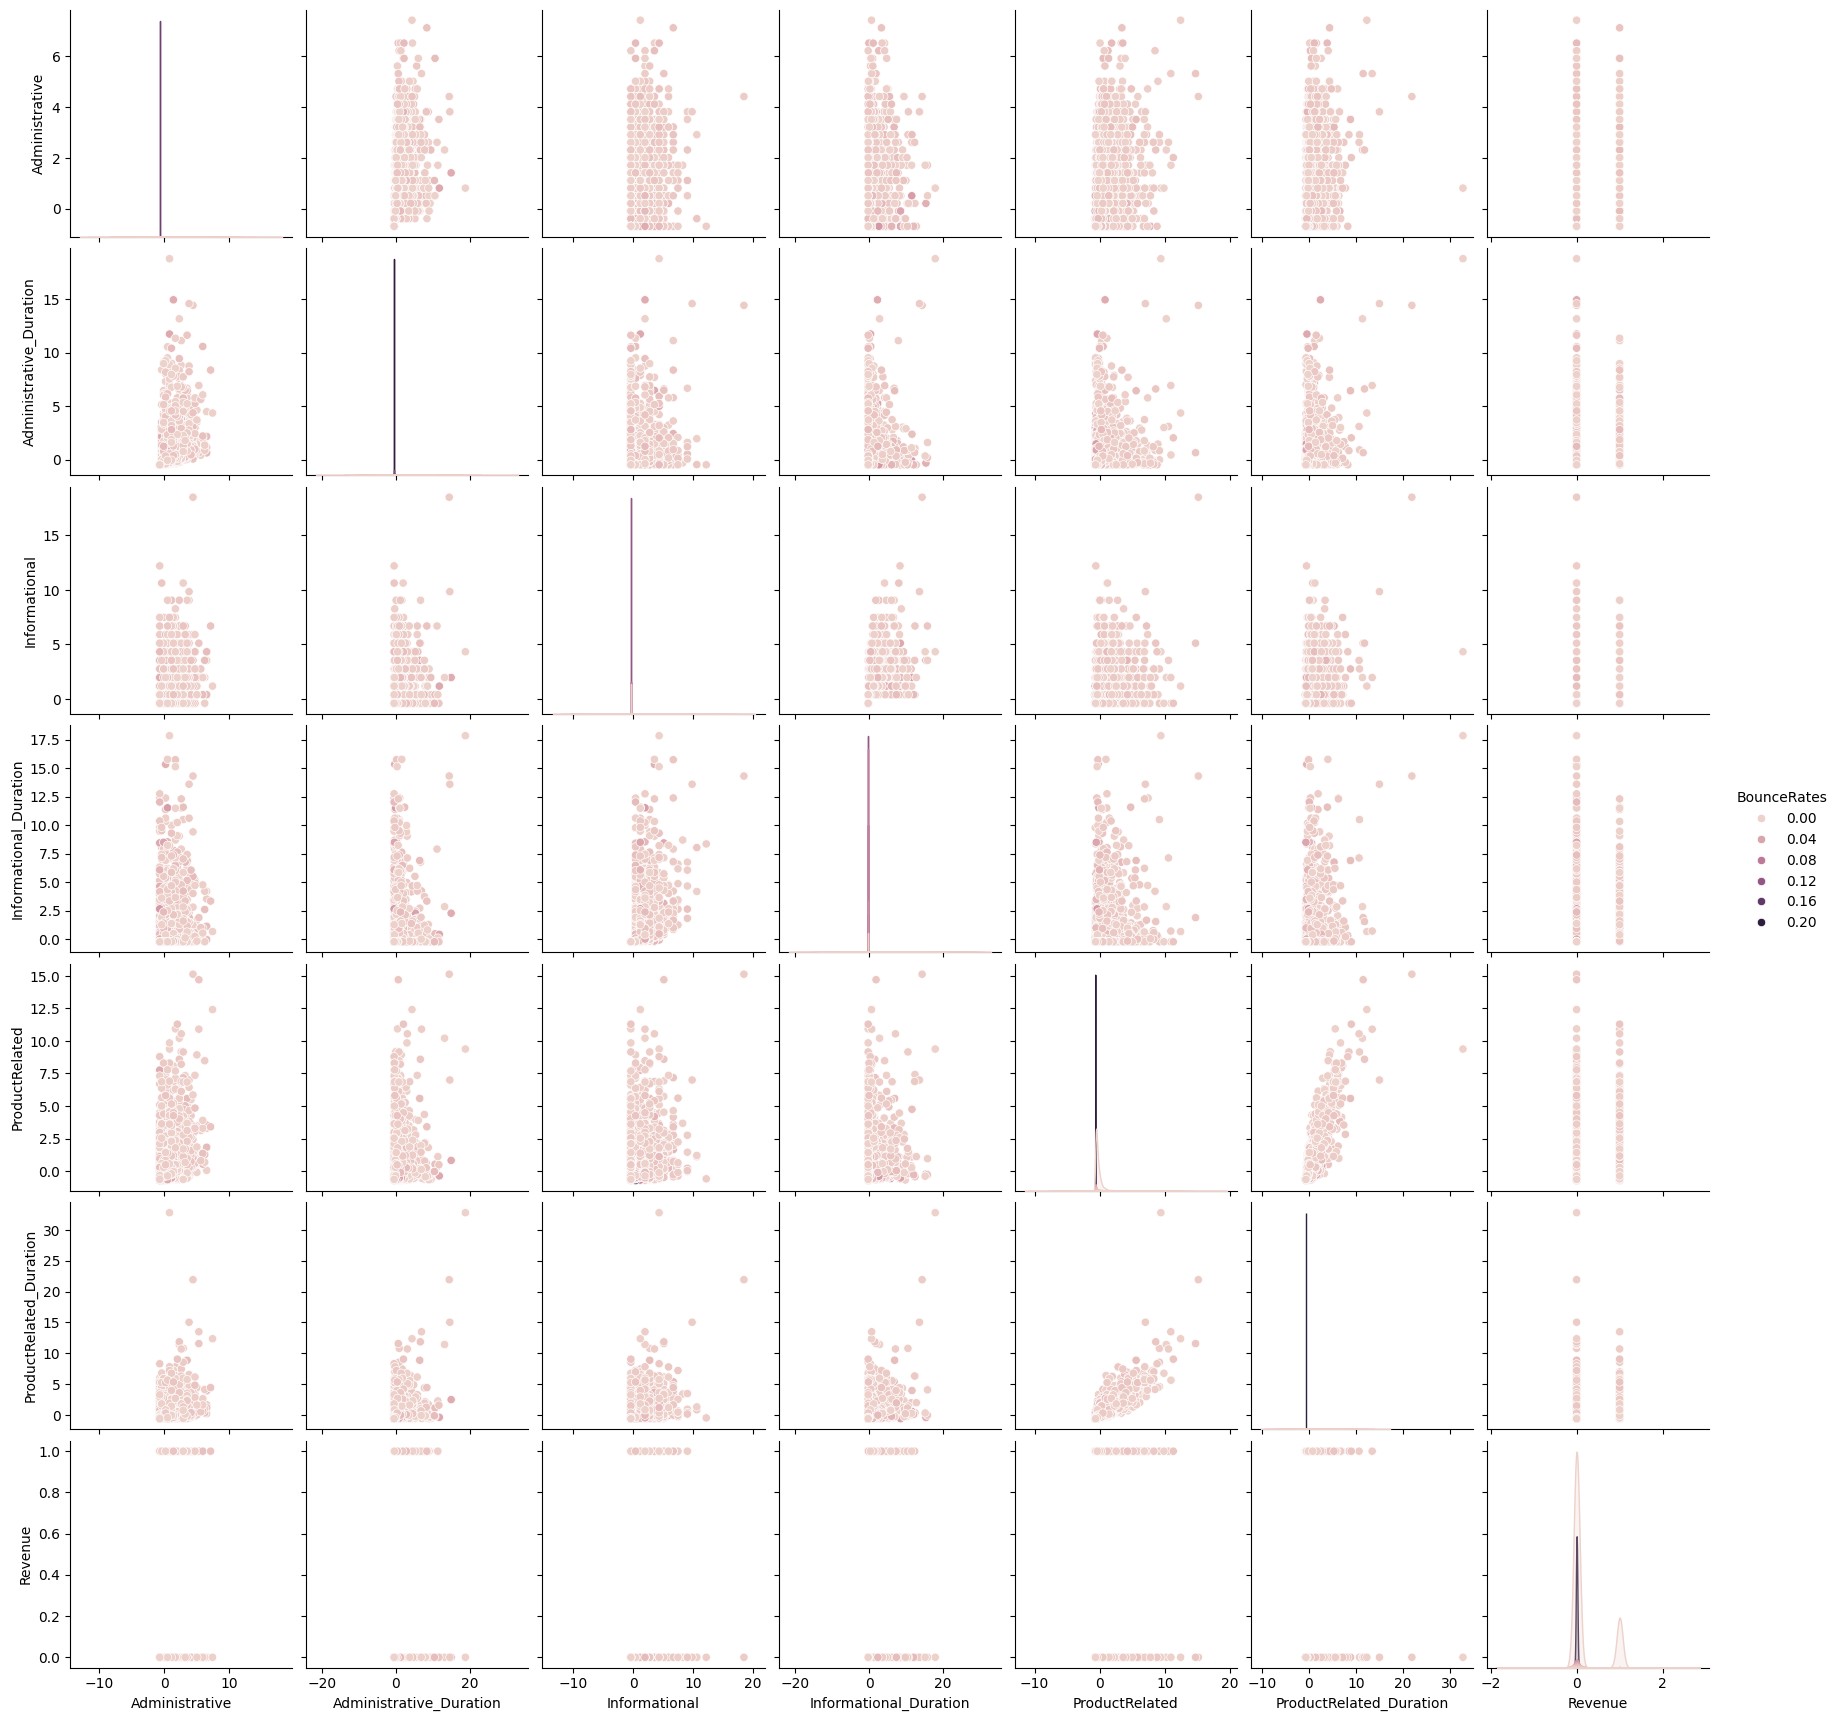

In [106]:
sns.pairplot(X_pad, hue='BounceRates')

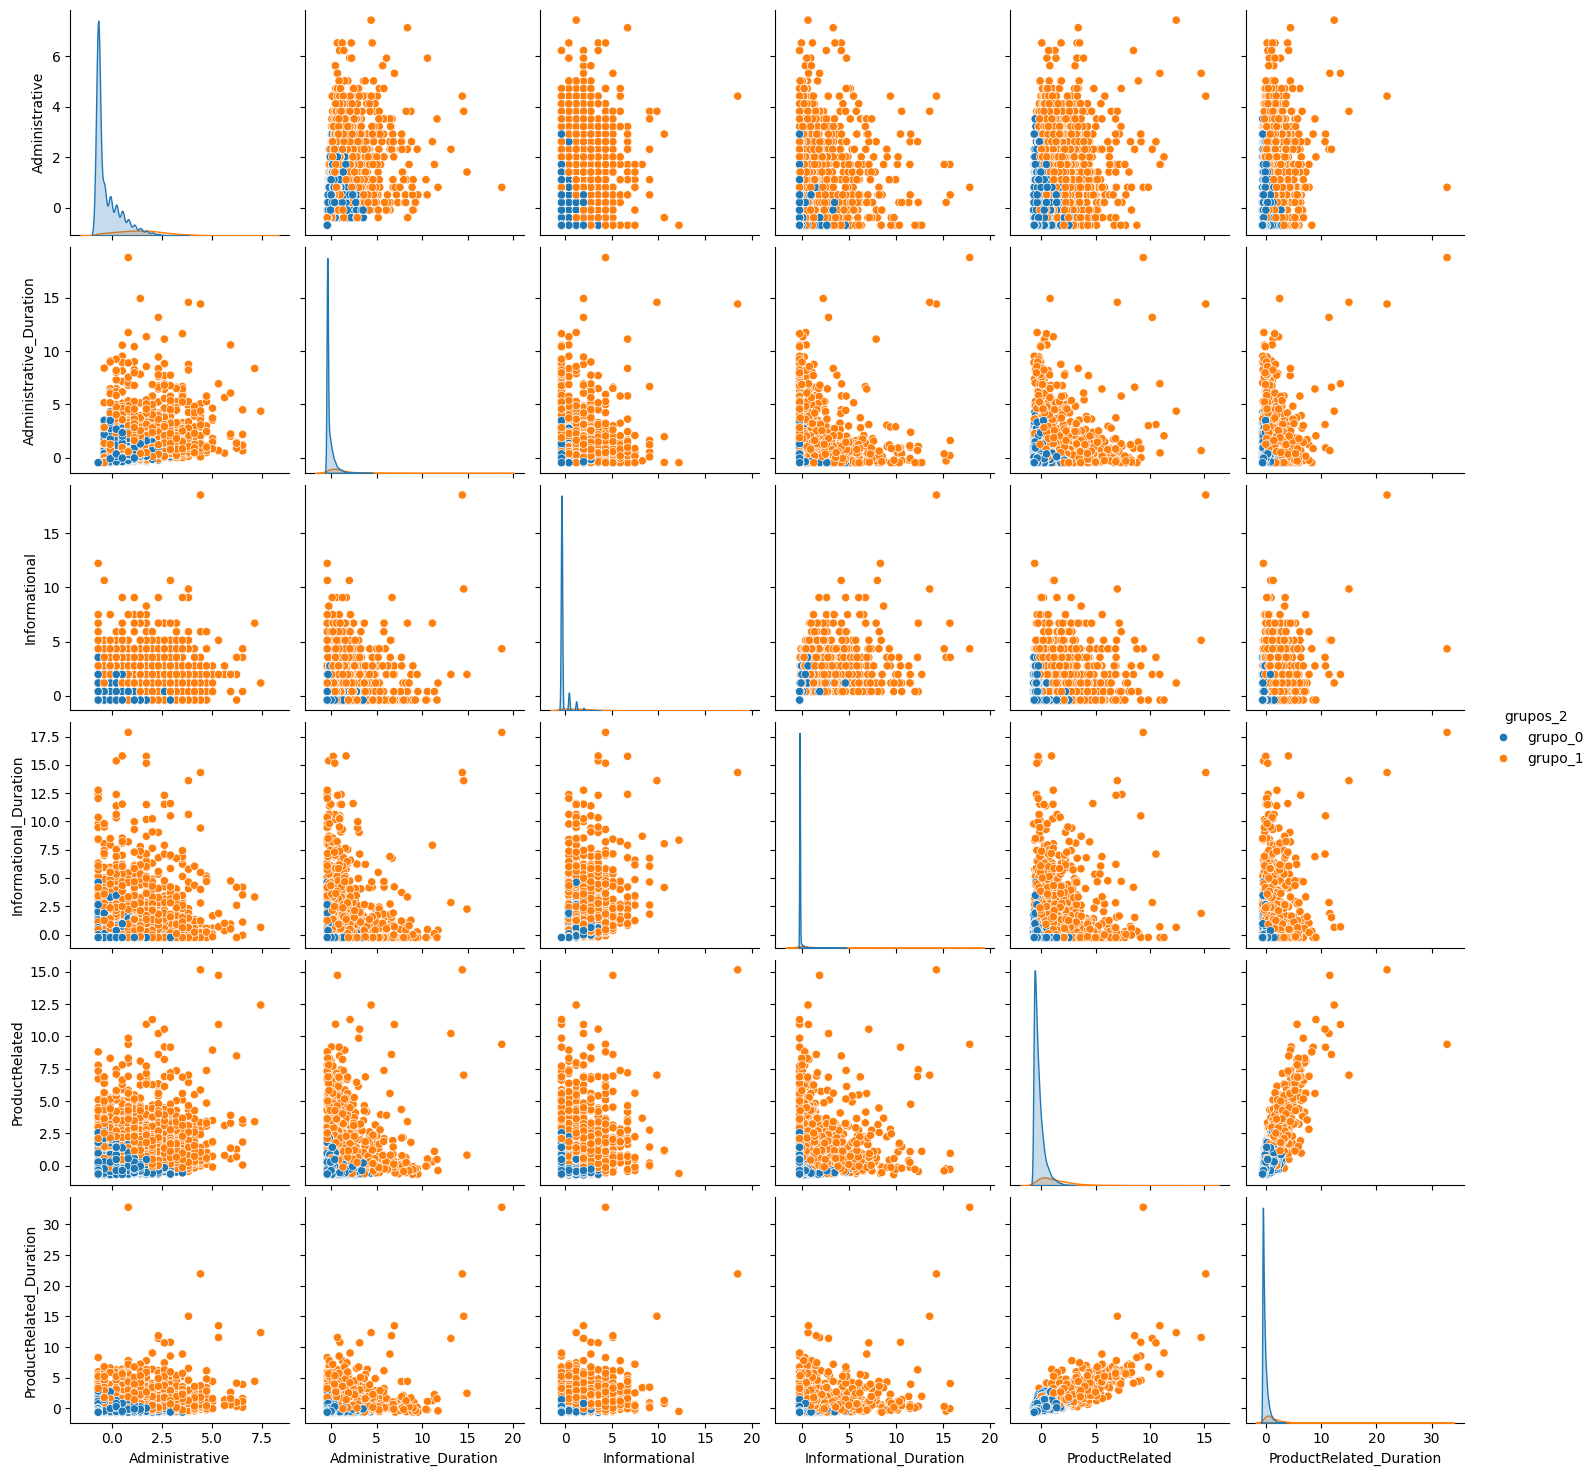

In [95]:
n_clusters = 2
var_grupo = 'grupos_' + str(n_clusters)
sns.pairplot(X_pad[variaveis + [var_grupo]], hue=var_grupo)

## Insight:

- Observa-se que para dois grupos e a variável Revenue, o grupo_0 apresenta uma maior quantidade de pessoas que realizaram a compra em comparação ao grupo_1, em relação aos números absolutos, contudo ela também apresenta uma quantidade muito grande de pessoas que não realizaram a compra.
- Observando o BounceRates verifica-se que no grupo_0 a quantidade de pessoas que entra nos sites e saem sem acionar outros requests durante a sessão é muito menor que no grupo_1, isso está de acordo com o que foi visto acima em que o grupo_0 realiza mais compras que o grupo_1.